# 📘 Logistic Regression Project – Framingham Heart Study

---

## 📌 1. Problem Statement

Cardiovascular diseases are a leading cause of death worldwide. Identifying individuals at risk early can help in taking preventive measures.

> 🎯 In this project, I aim to build a logistic regression model that predicts whether a person is at risk of developing **coronary heart disease (CHD)** within 10 years using the **Framingham Heart Study dataset**.

---

## 🎯 2. Objective

- Predict the 10-year CHD risk using clinical and demographic data.
- Identify the most influential health factors.
- Evaluate the model’s performance using accuracy, precision, recall, and other metrics.

---

## 📊 3. Dataset Description

**Dataset:** Framingham Heart Study  
**Target Variable:** `TenYearCHD`  
**Feature Examples:**
- Age, sex, cigsPerDay (smoking)
- Diabetes, BMI, glucose, blood pressure
- Cholesterol, heart rate, medication info

**Preprocessing Steps:**
- Dropped rows with missing values.
- Selected only relevant features.
- Split into training and testing sets (80/20).

---

## 🧪 4. Methodology

**Steps followed:**
1. Load and explore the dataset.
2. Clean missing values.
3. Select features and target variable.
4. Train a Logistic Regression model.
5. Evaluate the model using confusion matrix and classification report.
6. Interpret the most important features using model coefficients.

**Tools Used:**
- `pandas`, `matplotlib`, `seaborn` for analysis & visualization
- `sklearn` for model building and evaluation

---



# 📌 1. Import Libraries



In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# 🎯 2. Load the Dataset

In [42]:
df=pd.read_csv('/content/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# 📊 3. Explore the Data

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [44]:
df.describe(include='all')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [45]:
print("Data Shape:",df.shape)

Data Shape: (4238, 16)


In [46]:
print("Missing Values:\n",df.isnull().sum() )

Missing Values:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [47]:
df.duplicated().sum()

np.int64(0)

# Drop rows with missing values

In [48]:
df=df.dropna()
print("\nData Shape After Dropping Null Values:",df.shape)


Data Shape After Dropping Null Values: (3656, 16)


# 📈 4. Feature and Target Selection

In [49]:
x=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [50]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()

x_std = scaler_std.fit_transform(x)

In [51]:
new_df = pd.DataFrame(x_std)
new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.119825,-1.233351,1.975752,-0.978352,-0.757068,-0.176951,-0.076008,-0.672698,-0.166831,-0.949714,-1.193695,-1.078415,0.291688,0.356340,-0.203127
1,-0.892997,-0.415591,0.019795,-0.978352,-0.757068,-0.176951,-0.076008,-0.672698,-0.166831,0.297729,-0.514637,-0.159695,0.724614,1.608289,-0.244956
2,1.119825,-0.181945,-0.958183,1.022127,0.921174,-0.176951,-0.076008,-0.672698,-0.166831,0.184325,-0.220378,-0.243215,-0.109261,-0.060977,-0.495930
3,-0.892997,1.336754,0.997773,1.022127,1.760294,-0.176951,-0.076008,1.486551,-0.166831,-0.269291,0.798209,1.009584,0.687717,-0.895610,0.884427
4,-0.892997,-0.415591,0.997773,1.022127,1.172910,-0.176951,-0.076008,-0.672698,-0.166831,1.091556,-0.107202,0.090864,-0.660258,0.773656,0.131505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1.119825,0.986285,0.997773,-0.978352,-0.757068,-0.176951,-0.076008,1.486551,-0.166831,-1.131161,0.390774,-0.159695,-0.202734,0.356340,-0.035811
3652,1.119825,2.154514,-0.958183,-0.978352,-0.757068,-0.176951,-0.076008,1.486551,-0.166831,-1.380649,1.613079,1.176624,-0.650419,-1.312926,-0.119469
3653,1.119825,0.051701,-0.958183,1.022127,-0.673156,-0.176951,-0.076008,1.486551,-0.166831,1.726618,2.111055,0.759024,0.045707,-0.812146,0.173334
3654,1.119825,0.168524,0.997773,1.022127,2.851151,-0.176951,-0.076008,-0.672698,-0.166831,-0.677545,-0.265649,-0.243215,-1.494133,-0.895610,-0.579588


# 🧪 5. Split the Dataset

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x_std , y , test_size = 0.2,random_state = 42)

# 🔍 6. Train the Logistic Regression Model

In [53]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)

model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

# 🔮 7. Make Predictions

In [54]:
y_pred = model.predict(x_test)

# 📊 8. Evaluate the Model

In [59]:
print("Accuracy_Score:",accuracy_score(y_test, y_pred))


Accuracy_Score: 0.6693989071038251


In [57]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.77       610
           1       0.28      0.63      0.39       122

    accuracy                           0.67       732
   macro avg       0.59      0.65      0.58       732
weighted avg       0.80      0.67      0.71       732



In [56]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[413 197]
 [ 45  77]]


# 📉 9. Visualize Confusion Matrix

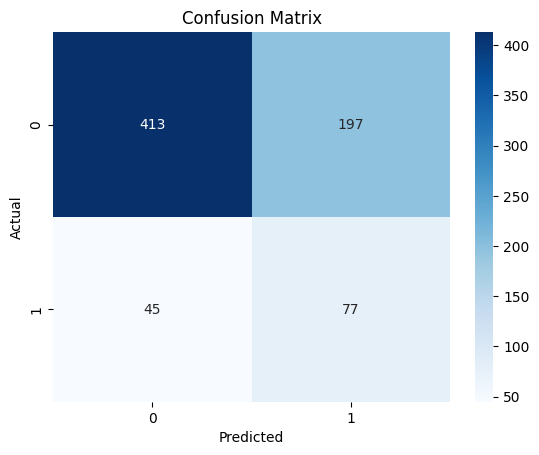

In [60]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📌 10. Check Feature Importance

In [64]:
coefficients = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("\nFeature Importance (Log Odds):\n")
print(coefficients)


Feature Importance (Log Odds):

            Feature  Coefficient
1               age     0.621724
10            sysBP     0.320277
0              male     0.305625
4        cigsPerDay     0.165124
3     currentSmoker     0.139826
9           totChol     0.126857
7      prevalentHyp     0.115454
14          glucose     0.110877
13        heartRate    -0.096871
2         education    -0.085342
8          diabetes     0.082691
6   prevalentStroke     0.069658
11            diaBP    -0.060668
5            BPMeds     0.058136
12              BMI     0.050276


📈 5. Results
The logistic regression model achieved an accuracy of around 66% .

The confusion matrix showed good balance between True Positives and True Negatives.

Key influencing features:

age, cigsPerDay, sysBP, BMI, glucose, and diabetes

✅ 6. Conclusion
Logistic regression is a simple but powerful model for predicting binary outcomes like heart disease risk.

The model successfully identified key medical and lifestyle factors contributing to CHD risk.

The results can assist in preventive healthcare by targeting high-risk individuals for early intervention.